In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
import matplotlib.pyplot as plt
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('../..')

In [2]:
import problems, projection, optimize

# testing problems
---
> - additional `Problems` parameters:
>> - `ESI`:      generates equivalent symmetric indefinite system; [QtQ Ct; C 0] [x; y] = [Qtb g] (for testing MINRES)
>> - `ESIN`:     generates ESI^T ESI symmetric positive semidefinite system (for testing CG)
>> - `ESIE`:     generates ESI expanded into Sean's second formulation (for testing MINRES without forming QtQ)
>> - `dir_soln`: generates direct solution for $w$ of the sort `la.solve` for $MRK_b R^T M^T w = MR s_b$
> - structure:
>> - 1D blur problems
>> - 2D blur problems

__1D blur__
> - pixels = 200
> - ROI(k) = 10, 100 , 190 with 3 steps
> - $\lambda$ = 0.01, $\kappa$ $\times$ 0.01, $\kappa$, $\kappa$ $\times$ 10
> - B = identity

---

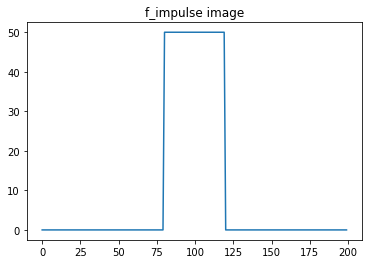

=================== setup ====================
(n_1, n_2, m) = (200, None, 200)
problem       = 1D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = 100

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
ESI3?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (200, 200)
X shape       = (200, 200)
M shape       = (50, 200)
B shape       = (200, 200)
sx shape      = (200, 1)
sb shape      = (200, 1)
============= system dimensions ===============
ESI_A shape   = (400, 400)
ESI_b shape   = (400,)
ESIN_A shape  = (400, 400)
ESIN_b shape  = (400,)
ESI3_A shape  = (600, 600)
ESI3_b shape  = (600,)


/Users/jakeroth/anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [3]:
# single test
## problem
n_1 = 200
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, ESIN=True, ESI3=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.459
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.51
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.431
===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 2
     beta: 0.05
===== method = all ======================================================================



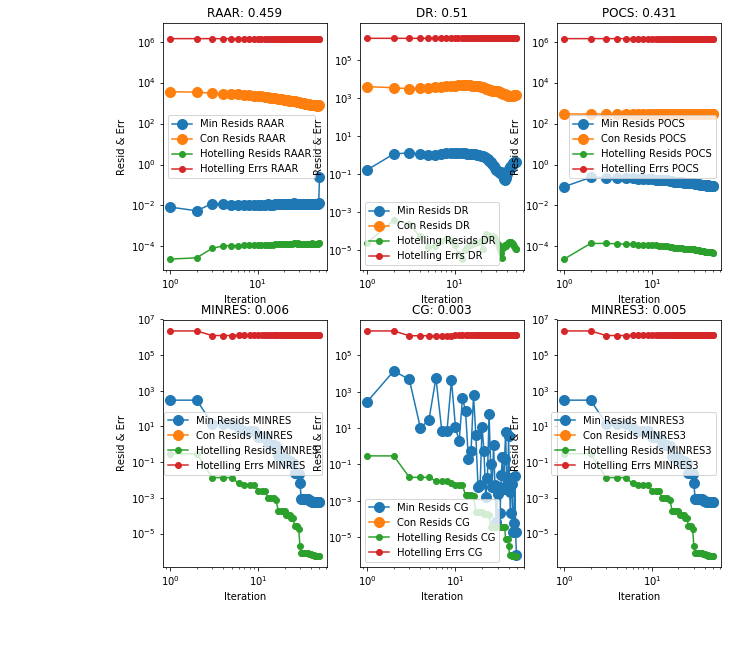

In [4]:
## examples: solve problem - - - - - - - - - - - - - - - - -
# projection.test_proj_alg(prob=p, method='pocs')
# projection.test_proj_alg(prob=p, method='dr', sl=1.25)
# projection.test_proj_alg(prob=p, method='raar')
# projection.test_proj_alg(prob=p, method='minres')
# projection.test_proj_alg(prob=p, method='cg')
m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.05)

In [5]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 200
kk     = np.linspace(10, 190, 3)

# find condition number of XtX
tp = problems.Problem(prob='b', n_1=n_1, k=k, ESI=False, ESIN=False, ESI3=False, dir_soln=True)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

# set regularization
lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

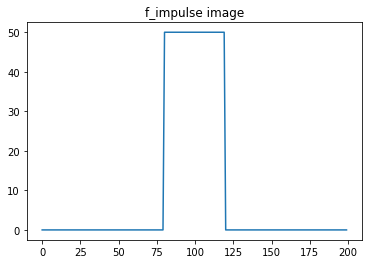

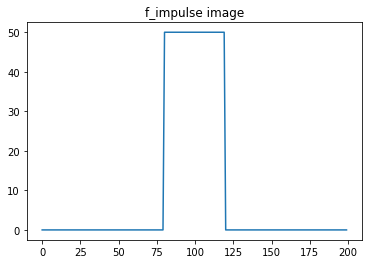

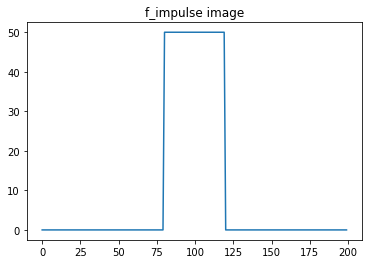

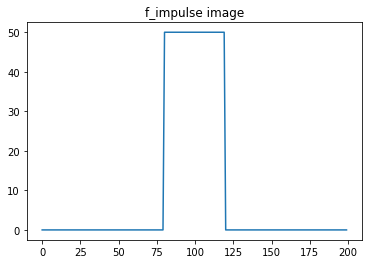

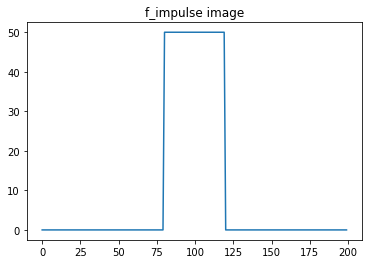

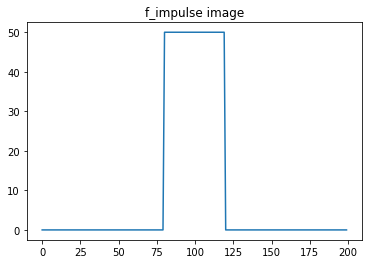

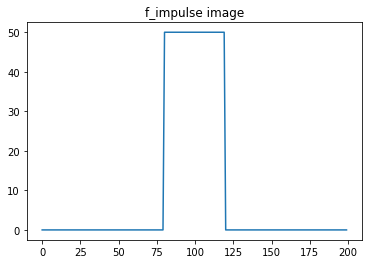

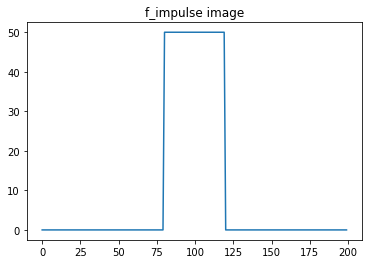

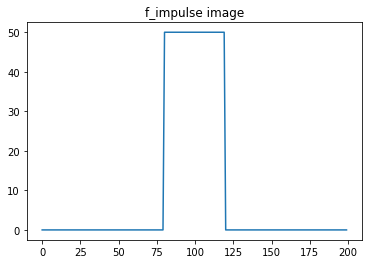

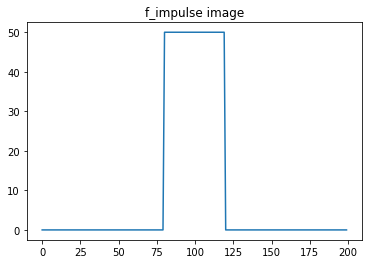

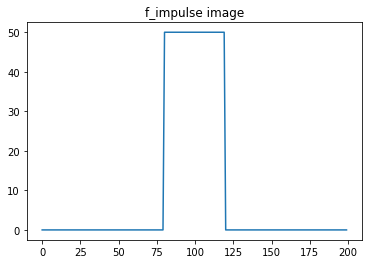

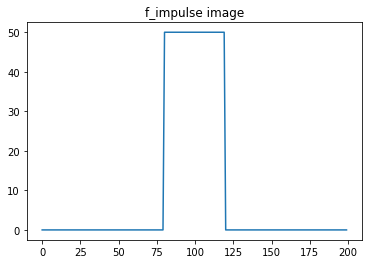

In [6]:
# create problems
ps = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps.append(p)

In [7]:
# # solve problems individually
# for p in ps:
#     projection.test_proj_alg(prob=p, method='pocs')
#     projection.test_proj_alg(prob=p, method='dr', sl_dr=1.5)
#     projection.test_proj_alg(prob=p, method='raar', beta=0.5)
#     projection.test_proj_alg(prob=p, method='minres')


----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.312
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.368
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.306
===== method = all ======================================================================
          lam: 1.00E-02
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



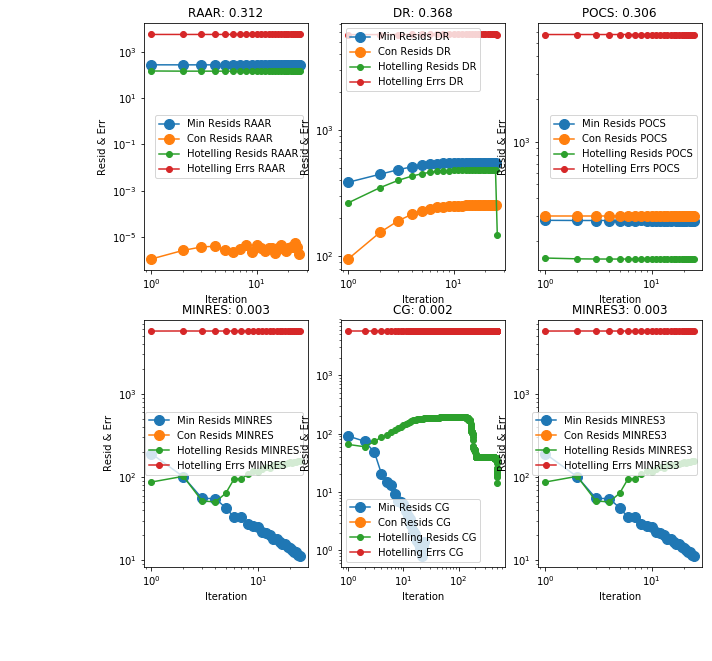

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[156.38292988549546, 156.38292988549546, 156.38292988549546, 156.38292988549546]
[5727.1033779360932, 5727.1033779360932, 5727.1033779360932, 5727.1033779360932]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.22
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.237
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.216
===== method = all ======================================================================
          lam: 1.95E+09
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ============================================

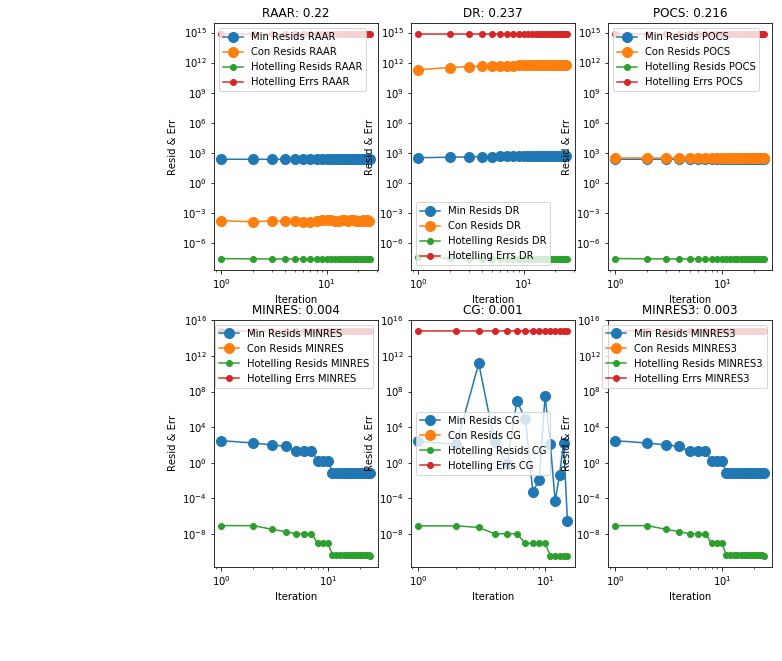

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[8.1068394267133911e-08, 8.1068394267133911e-08, 8.1068394267133911e-08, 8.1068394267133911e-08]
[644656874182030.75, 644656874182030.75, 644656874182030.75, 644656874182030.75]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.237
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.247
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.28
===== method = all ======================================================================
          lam: 1.95E+10
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ============================

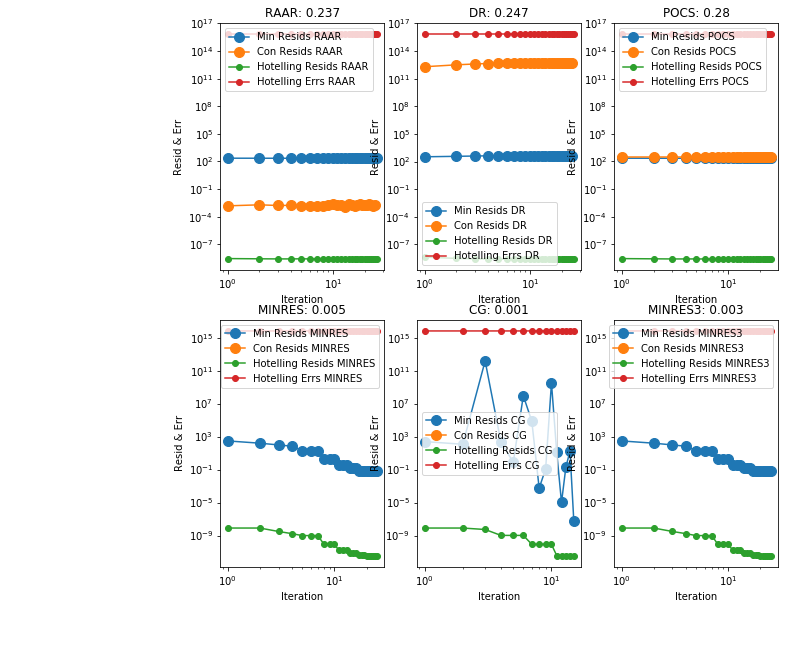

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[8.1068394304458245e-09, 8.1068394304458245e-09, 8.1068394304458245e-09, 8.1068394304458245e-09]
[6446568740476829.0, 6446568740476829.0, 6446568740476829.0, 6446568740476829.0]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.255
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.296
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.244
===== method = all ======================================================================
          lam: 1.95E+11
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================

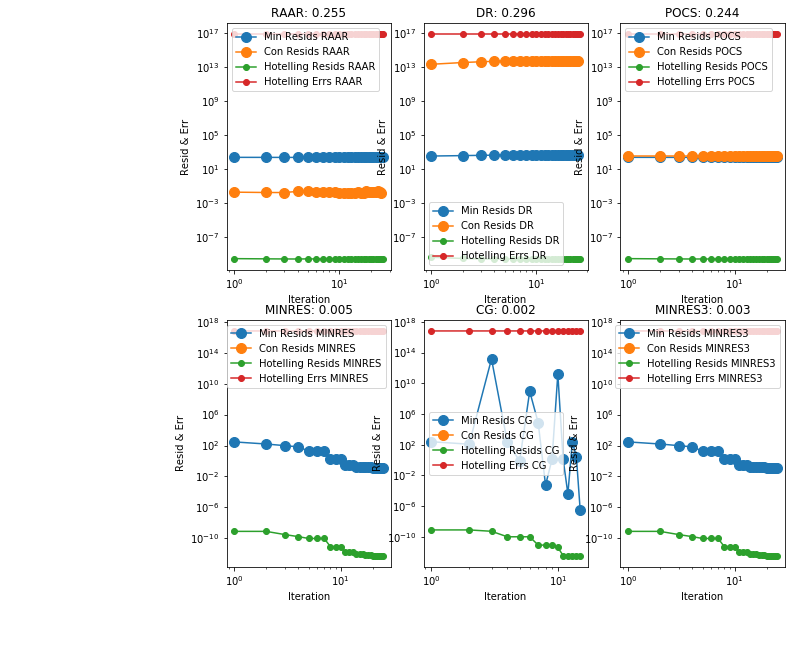

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[8.1068394308190695e-10, 8.1068394308190695e-10, 8.1068394308190695e-10, 8.1068394308190695e-10]
[64465687383425160.0, 64465687383425160.0, 64465687383425160.0, 64465687383425160.0]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.353
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.364
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.321
===== method = all ======================================================================
          lam: 1.00E-02
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================

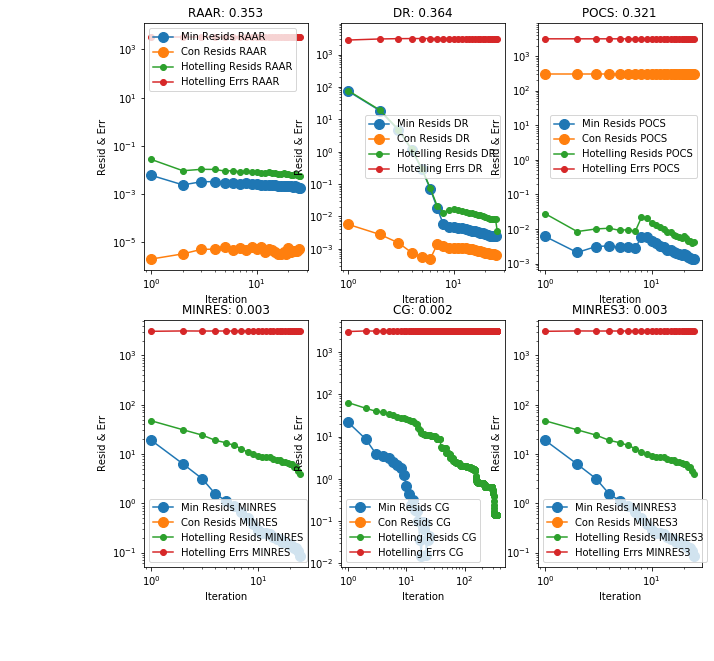

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[308.85786901538262, 308.85786901538262, 308.85786901538262, 308.85786901538262]
[2997.9321156254705, 2997.9321156254705, 2997.9321156254705, 2997.9321156254705]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.337
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.382
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.312
===== method = all ======================================================================
          lam: 1.95E+09
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================================

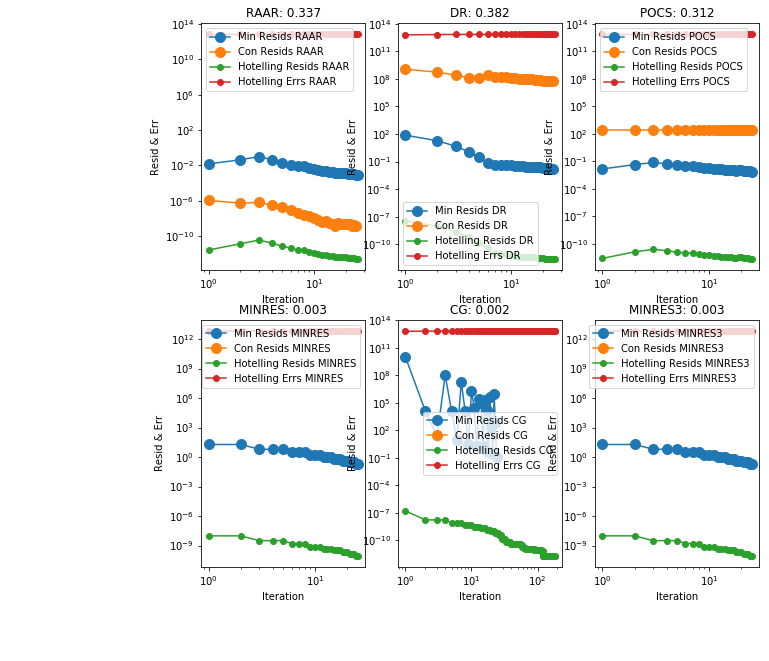

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196207467823e-07, 1.5213196207467823e-07, 1.5213196207467823e-07, 1.5213196207467823e-07]
[6167467379117.7979, 6167467379117.7979, 6167467379117.7979, 6167467379117.7979]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.349
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.394
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.337
===== method = all ======================================================================
          lam: 1.95E+10
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================

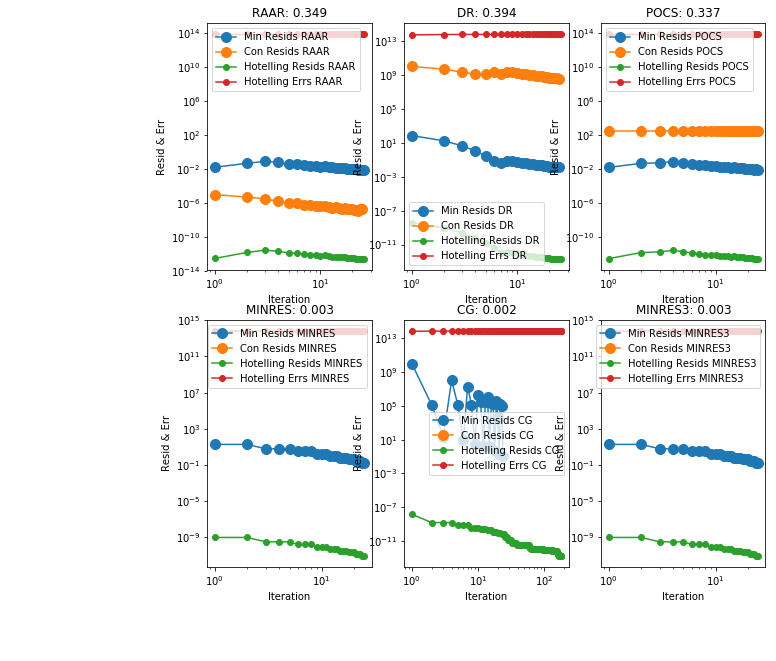

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214272973e-08, 1.5213196214272973e-08, 1.5213196214272973e-08, 1.5213196214272973e-08]
[61674673794308.531, 61674673794308.531, 61674673794308.531, 61674673794308.531]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.33
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.326
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.298
===== method = all ======================================================================
          lam: 1.95E+11
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================

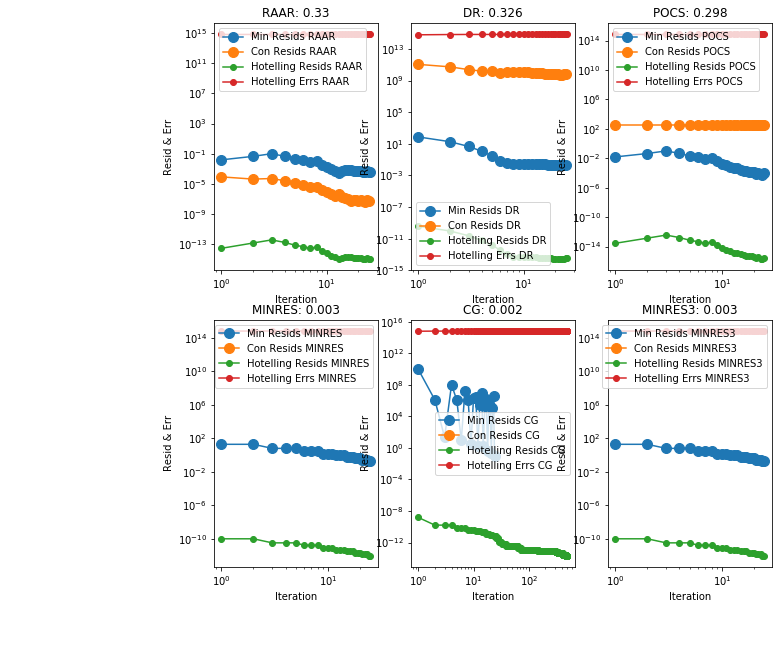

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214953494e-09, 1.5213196214953494e-09, 1.5213196214953494e-09, 1.5213196214953494e-09]
[616746737902783.5, 616746737902783.5, 616746737902783.5, 616746737902783.5]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.507
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.527
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.531
===== method = all ======================================================================
          lam: 1.00E-02
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==============================

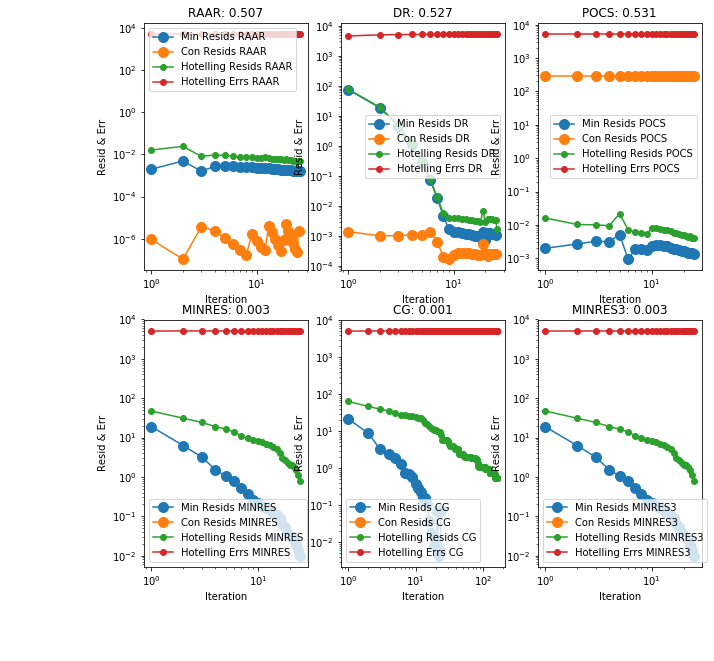

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[308.85786928969543, 308.85786928969543, 308.85786928969543, 308.85786928969543]
[4132.3642437238568, 4132.3642437238568, 4132.3642437238568, 4132.3642437238568]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.555
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.525
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.466
===== method = all ======================================================================
          lam: 1.95E+09
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================================

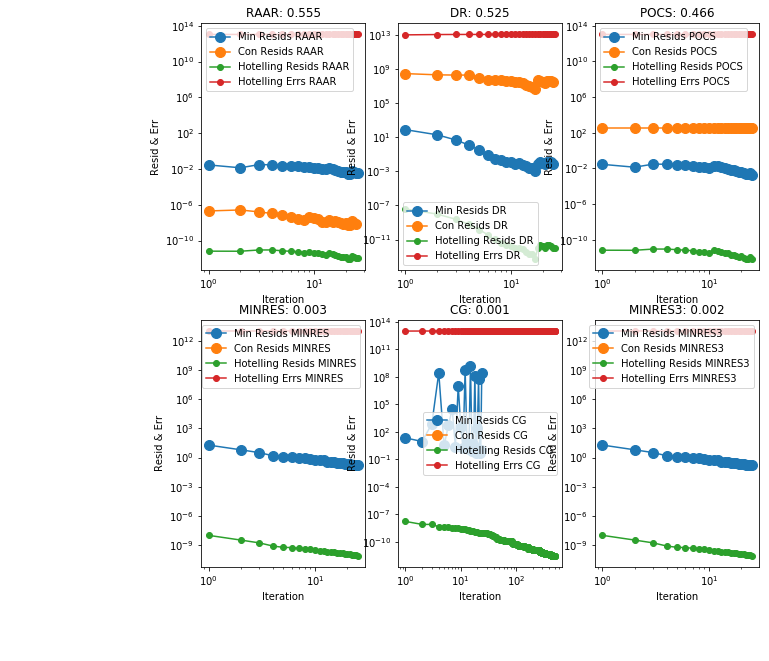

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196207467823e-07, 1.5213196207467823e-07, 1.5213196207467823e-07, 1.5213196207467823e-07]
[8501267097290.5479, 8501267097290.5479, 8501267097290.5479, 8501267097290.5479]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.51
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.561
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.542
===== method = all ======================================================================
          lam: 1.95E+10
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================

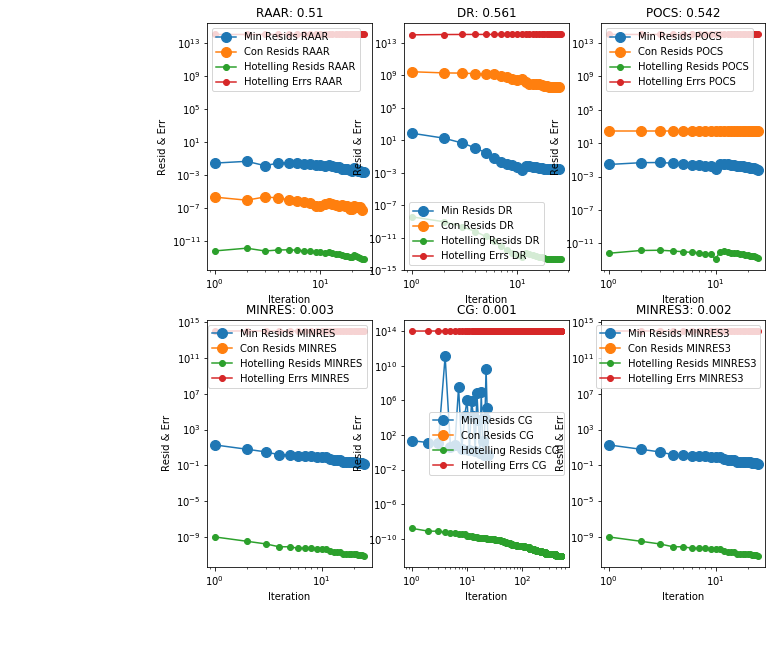

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214272973e-08, 1.5213196214272973e-08, 1.5213196214272973e-08, 1.5213196214272973e-08]
[85012671040124.453, 85012671040124.453, 85012671040124.453, 85012671040124.453]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 0.53
----- DR -------------------------
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
----- DR -------------------------
    dr runtime: 0.515
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 0.506
===== method = all ======================================================================
          lam: 1.95E+11
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================

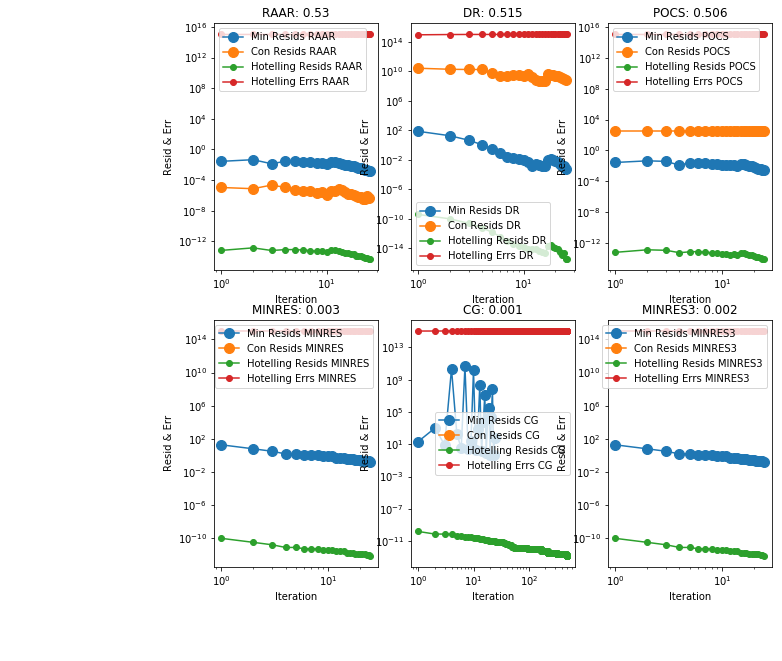

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214953492e-09, 1.5213196214953492e-09, 1.5213196214953492e-09, 1.5213196214953492e-09]
[850126711073347.25, 850126711073347.25, 850126711073347.25, 850126711073347.25]



In [8]:
# solve problems together
m_rs = []
c_rs = []
h_rs = []
h_es = []
for p,idx in zip(ps,range(len(ps))):
    m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5, max_iter=25)
    m_rs.append([m_r[i][0] for i in range(4)])
    c_rs.append([c_r[i][0] for i in range(3)])
    h_rs.append([h_r[i][0] for i in range(4)])
    h_es.append([h_e[i][0] for i in range(4)])
    print(m_rs[idx])
    print(c_rs[idx])
    print(h_rs[idx])
    print(h_es[idx])
    print("")

-  __2D blur__
> - pixels = 1050
>> - dims: 21 $\times$ 50
> - ROI(k) = 5, 25, 45 with 3 steps (middle row 10)
> - $\lambda$ = 0.01, $\kappa$ $\times$ 0.01, $\kappa$, $\kappa$ $\times$ 10
> - B = identity

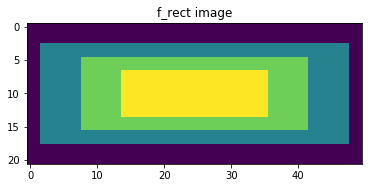

=================== setup ====================
(n_1, n_2, m) = (21, 50, 1050)
problem       = 2D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = 10

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
ESI3?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (1050, 1050)
X shape       = (1050, 1050)
M shape       = (50, 1050)
B shape       = (1050, 1050)
sx shape      = (1050, 1)
sb shape      = (1050, 1)
============= system dimensions ===============
ESI_A shape   = (2100, 2100)
ESI_b shape   = (2100,)
ESIN_A shape  = (2100, 2100)
ESIN_b shape  = (2100,)
ESI3_A shape  = (3150, 3150)
ESI3_b shape  = (3150,)


In [9]:
# single test
## problem
n_1 = 21
n_2 = 50
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, lam=lam, ESI=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 33.381
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 35.26
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 35.107
===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.05
===== method = all ======================================================================



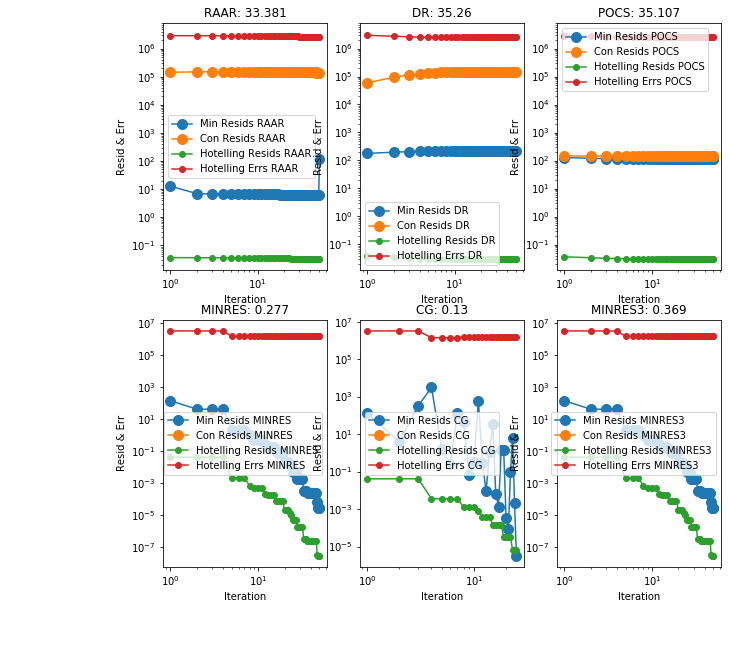

In [10]:
m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.05, sl_dr=1.5)

In [11]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 21
n_2    = 50
k      = 50
kk     = [5, 25, 45]

# find condition number of XtX
tp = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, ESI=False, ESIN=False, ESI3=False,dir_soln=False)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

# set regularization
lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

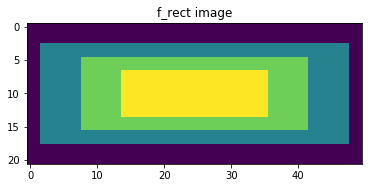

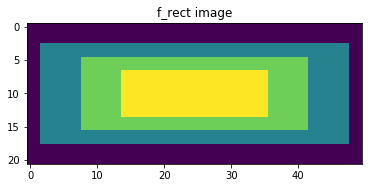

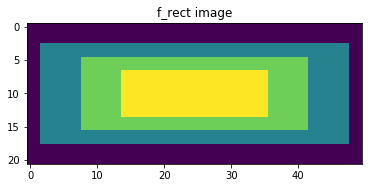

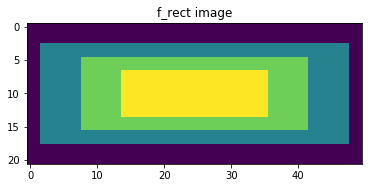

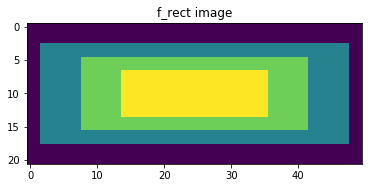

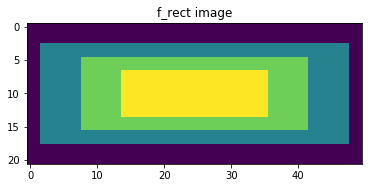

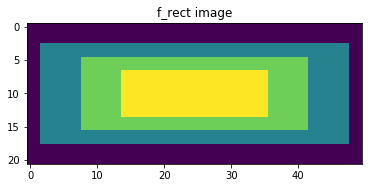

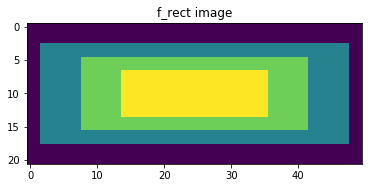

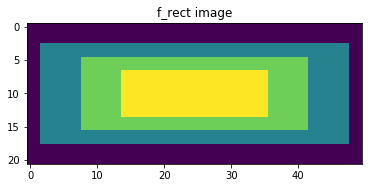

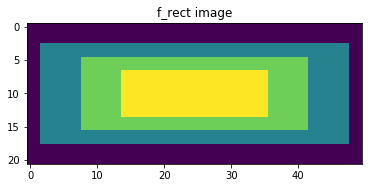

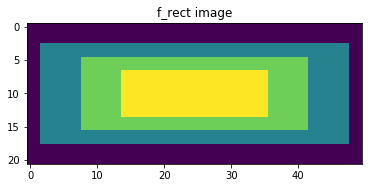

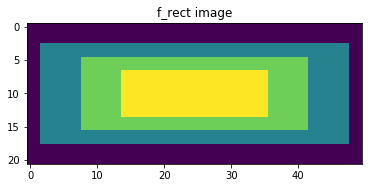

In [12]:
# create problems
ps2d = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, n_2=n_2, k=k, lam=lam, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps2d.append(p)

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.639
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 18.043
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 15.462
===== method = all ======================================================================
          lam: 1.00E-02
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



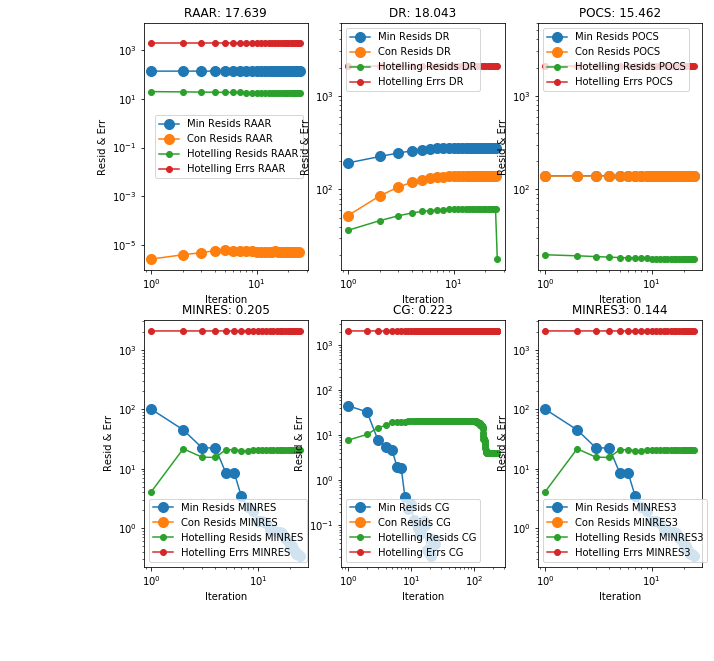

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[20.675169862332233, 20.675169862332233, 20.675169862332233, 20.675169862332233]
[2078.0531820239462, 2078.0531820239462, 2078.0531820239462, 2078.0531820239462]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 15.701
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 16.702
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 14.786
===== method = all ======================================================================
          lam: 9.67E+17
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================================

/Users/jakeroth/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


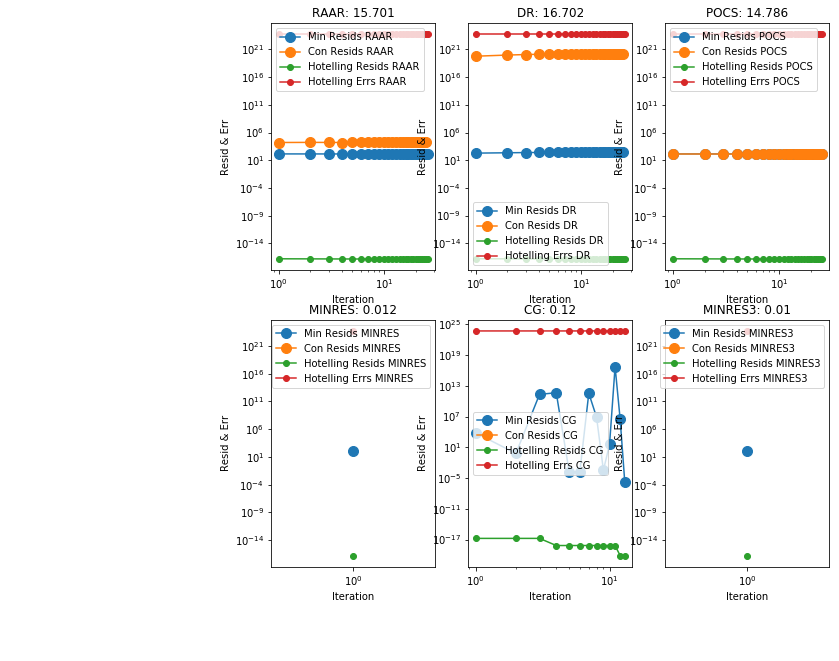

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.683130126749051e-17, 1.683130126749051e-17, 1.683130126749051e-17, 1.683130126749051e-17]
[5.1329425480054633e+23, 5.1329425480054633e+23, 5.1329425480054633e+23, 5.1329425480054633e+23]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 16.65
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 17.064
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 15.122
===== method = all ======================================================================
          lam: 9.67E+18
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ================

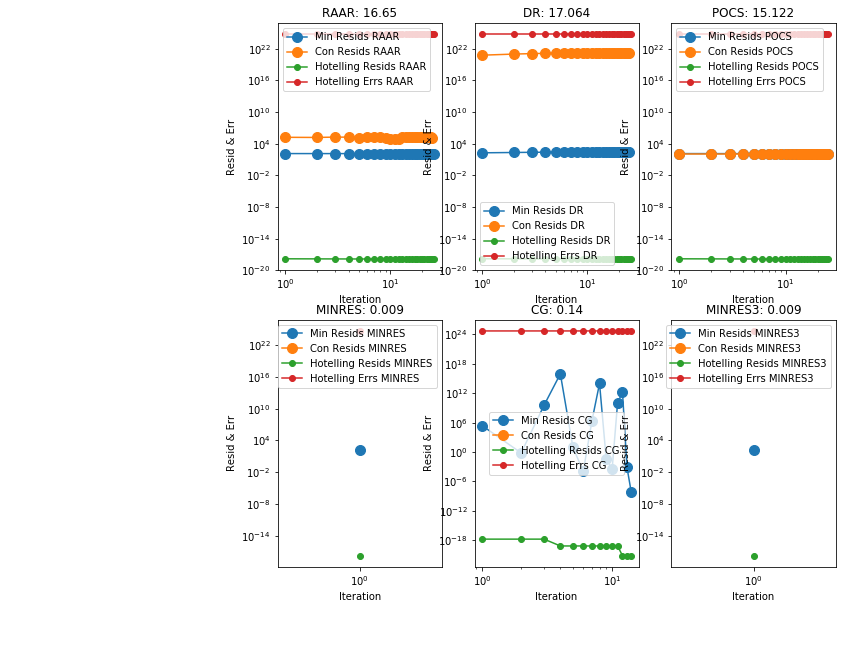

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.6831301267490516e-18, 1.6831301267490516e-18, 1.6831301267490516e-18, 1.6831301267490516e-18]
[5.1329425413615531e+24, 5.1329425413615531e+24, 5.1329425413615531e+24, 5.1329425413615531e+24]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 16.71
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 16.318
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 14.89
===== method = all ======================================================================
          lam: 9.67E+19
            k: 5
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all =============

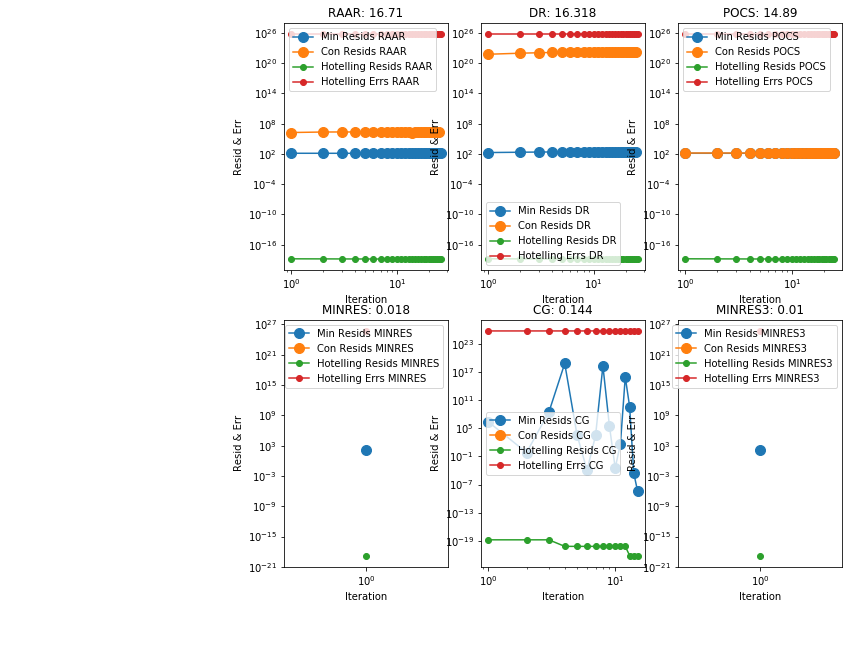

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[1.6831301267490512e-19, 1.6831301267490512e-19, 1.6831301267490512e-19, 1.6831301267490512e-19]
[5.1329425446602308e+25, 5.1329425446602308e+25, 5.1329425446602308e+25, 5.1329425446602308e+25]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.834
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 18.763
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 18.13
===== method = all ======================================================================
          lam: 1.00E-02
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========

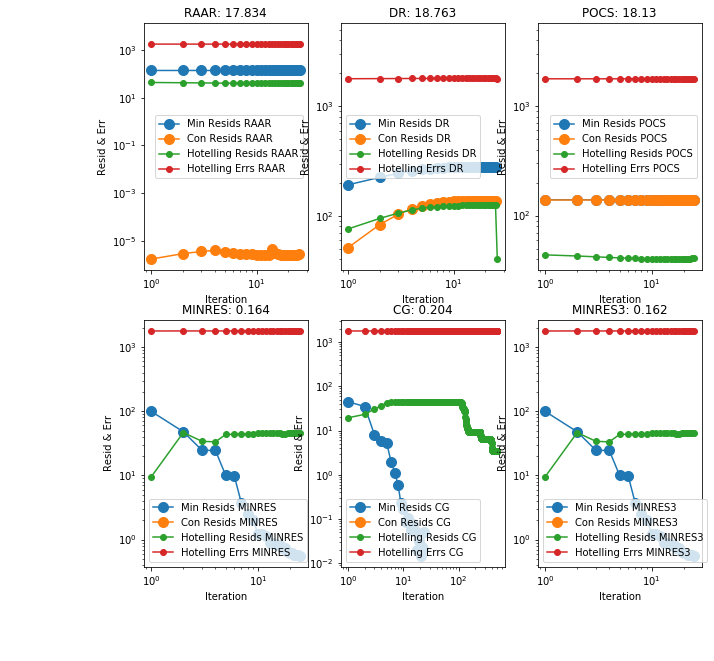

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[45.104524530976306, 45.104524530976306, 45.104524530976306, 45.104524530976306]
[1779.7310263784361, 1779.7310263784361, 1779.7310263784361, 1779.7310263784361]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.285
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 17.636
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 17.173
===== method = all ======================================================================
          lam: 9.67E+17
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========================================

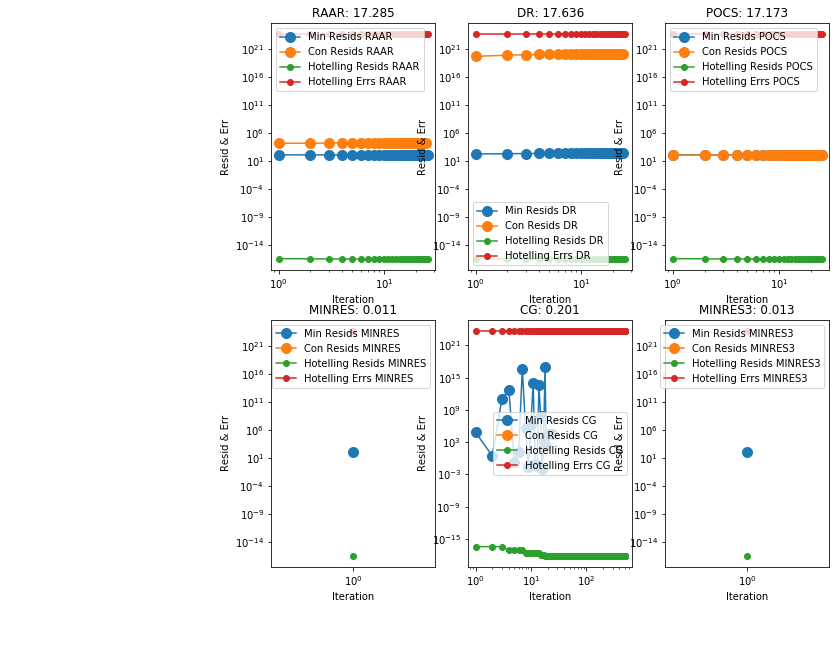

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.6182272885144913e-17, 3.6182272885144913e-17, 3.6182272885144913e-17, 3.6182272885144913e-17]
[4.8666955671432857e+23, 4.8666955671432857e+23, 4.8666955671432857e+23, 4.8666955671432857e+23]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 16.676
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 17.263
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 15.787
===== method = all ======================================================================
          lam: 9.67E+18
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========

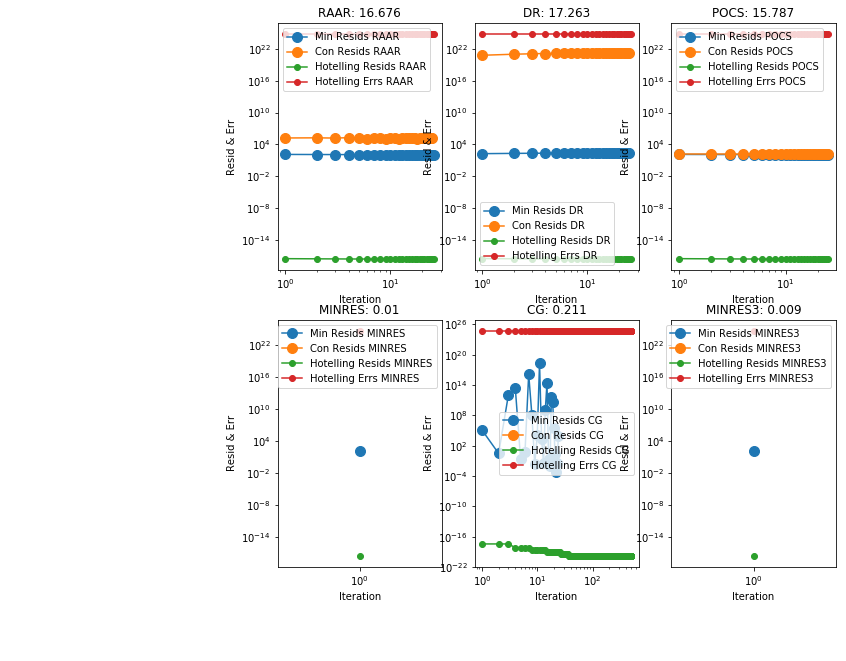

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.6182272885144912e-18, 3.6182272885144912e-18, 3.6182272885144912e-18, 3.6182272885144912e-18]
[4.8666955526088949e+24, 4.8666955526088949e+24, 4.8666955526088949e+24, 4.8666955526088949e+24]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.045
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 16.59
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 15.661
===== method = all ======================================================================
          lam: 9.67E+19
            k: 25
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========

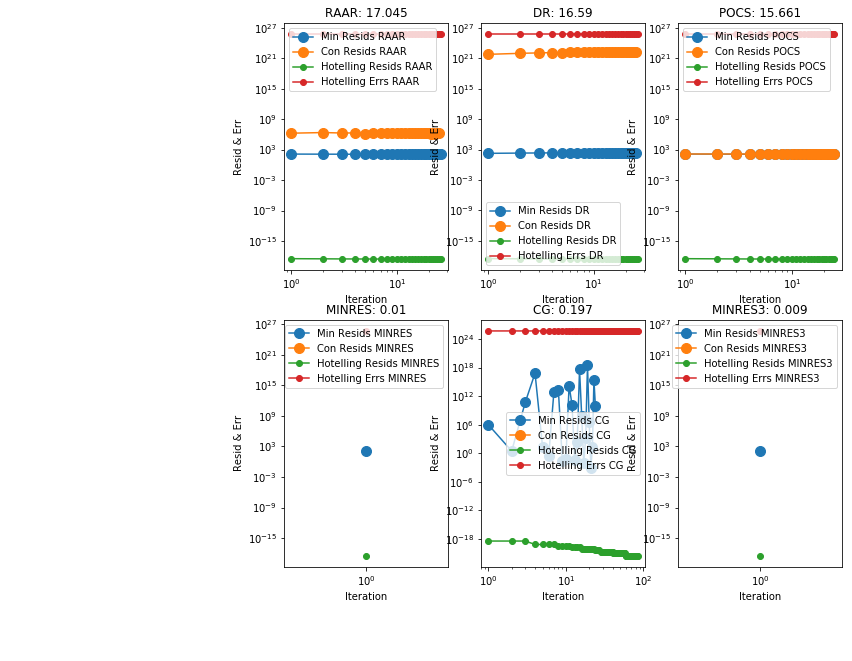

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[3.6182272885144926e-19, 3.6182272885144926e-19, 3.6182272885144926e-19, 3.6182272885144926e-19]
[4.8666955616067477e+25, 4.8666955616067477e+25, 4.8666955616067477e+25, 4.8666955616067477e+25]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 18.783
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 19.708
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 19.324
===== method = all ======================================================================
          lam: 1.00E-02
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========

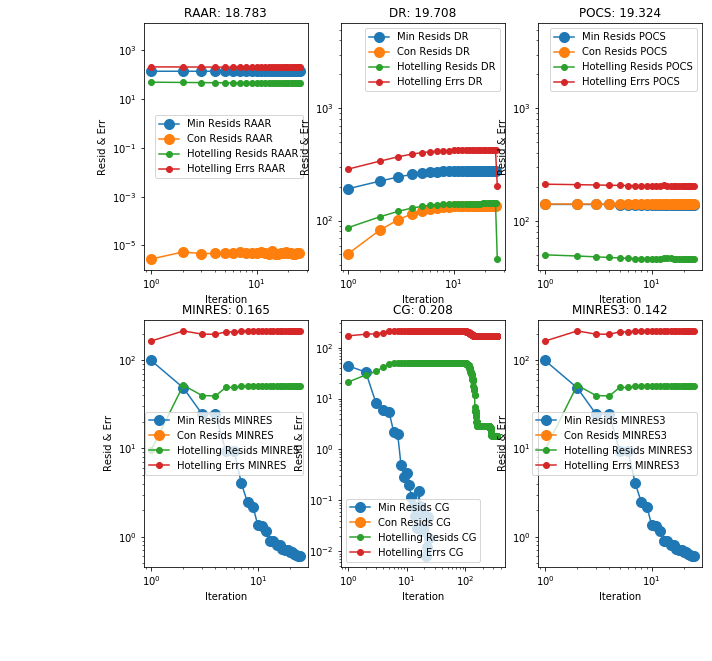

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[51.223111822513467, 51.223111822513467, 51.223111822513467, 51.223111822513467]
[213.77309008949706, 213.77309008949706, 213.77309008949706, 213.77309008949706]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.85
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 17.592
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 17.216
===== method = all ======================================================================
          lam: 9.67E+17
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ===========================================

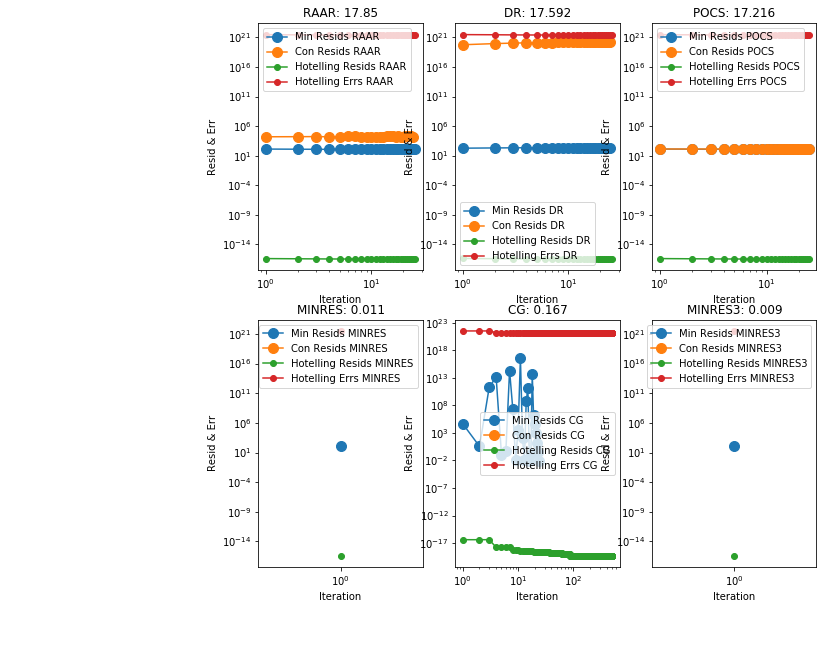

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[4.2060891869146275e-17, 4.2060891869146275e-17, 4.2060891869146275e-17, 4.2060891869146275e-17]
[3.2095618057498662e+21, 3.2095618057498662e+21, 3.2095618057498662e+21, 3.2095618057498662e+21]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 17.426
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 16.857
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 17.527
===== method = all ======================================================================
          lam: 9.67E+18
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========

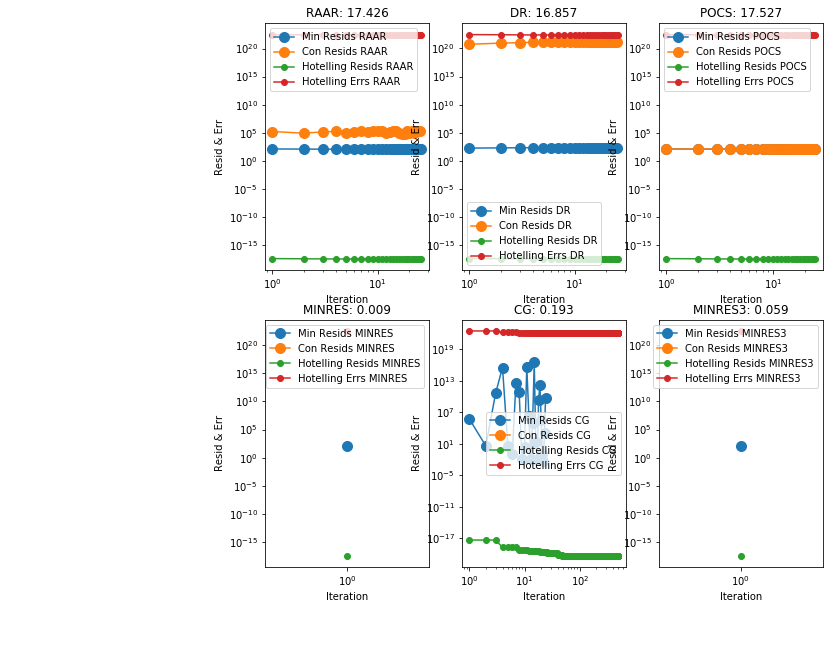

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[4.2060891869146275e-18, 4.2060891869146275e-18, 4.2060891869146275e-18, 4.2060891869146275e-18]
[3.2095617845151824e+22, 3.2095617845151824e+22, 3.2095617845151824e+22, 3.2095617845151824e+22]

----- RAAR -----------------------
(0.0, 'raar constr 0')
(4528.6127470097144, 'raar resid 0')
----- RAAR -----------------------
    raar runtime: 18.856
----- DR -------------------------
(0.0, 'dr constr 0')
(4528.6127470097144, 'dr min 0')
----- DR -------------------------
    dr runtime: 19.377
----- POCS -----------------------
(0.0, 'pocs constr 0')
(4528.6127470097144, 'pocs resid 0')
----- POCS -----------------------
    pocs runtime: 17.742
===== method = all ======================================================================
          lam: 9.67E+19
            k: 45
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ==========

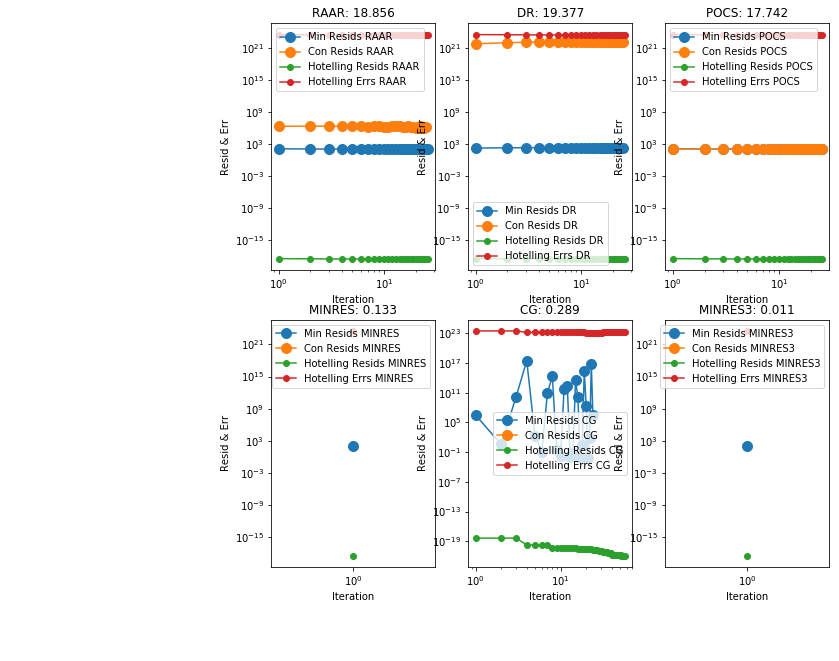

[4528.6127470097144, 4528.6127470097144, 4528.6127470097144, 139.75602350892515]
[0.0, 0.0, 0.0]
[4.2060891869146294e-19, 4.2060891869146294e-19, 4.2060891869146294e-19, 4.2060891869146294e-19]
[3.2095617777592452e+23, 3.2095617777592452e+23, 3.2095617777592452e+23, 3.2095617777592452e+23]



In [13]:
# solve problems together
m_rs = []
c_rs = []
h_rs = []
h_es = []
for p,idx in zip(ps2d,range(len(ps2d))):
    m_r, c_r, h_r, h_e, rt = projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5, max_iter=25)
    m_rs.append([m_r[i][0] for i in range(4)])
    c_rs.append([c_r[i][0] for i in range(3)])
    h_rs.append([h_r[i][0] for i in range(4)])
    h_es.append([h_e[i][0] for i in range(4)])
    print(m_rs[idx])
    print(c_rs[idx])
    print(h_rs[idx])
    print(h_es[idx])
    print("")